<a href="https://colab.research.google.com/github/roimv/ProgramacionCaseraGithub/blob/master/Ra%C3%BAl_Marina_Roi_PonenciaEsri_Octubre2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descargamos los datos

Primero creamos un script que descargue los datos de [este repositorio](https://github.com/ageron/handson-ml/tree/master/datasets/housing).

In [ ]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

A continuación exploramos los datos:

In [ ]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Si miramos detenidamente los datos llegaremos a la conclusión de que cada registro representa una agrupación de viviendas (un distrito). Y que son atributos representan:

* `longitude` y `latitude` <- las coordenadas del centroide del distrito al que representa
* `housing_median_age` <- la edad media de las vivienda del distrito
* `total_rooms` <- el número de habitaciones es la suma de habitaciones en el distrito
* `total_bedrooms` <- el número de dormitorios es la suma de dormitorios en el distrito
* `population` <- la población total que vive en el distrito
* `households` <- el número de hogares número de casas en el distrito
* `median_income` <- el ingresos medios por persona en ese distrito
* `median_house_value` <- el valor medio de la casa en el distrito
* `ocean_proximity` <- la proximidad al océano del distrito

A continuacón vamos a extraer algunas estadísticas para entender mejor qué valores contienen nuestros datos:

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Vemos que hay 20.640 registros en este juego de datos, por lo que es bastante pequeño para los estándares de Machine Learning, pero es suficiente para principiantes. Hay que tener en cuenta que el atributo `total_bedrooms` tiene 20.433 valores no nulos, **esto significa que 207 distritos no tienen valor en "total_bed rooms"**. Ya nos ocuparemos de esto más tarde.

También se puede ver que todos los atributos (salvo el campo `ocean_proximity`) son tipo número, por ello vamos a explorar qué valores contiene:

In [ ]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Vamos a echar un vistazo al resto de campos:

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Algunas consideraciones:

* En `count` se ignoran los valores nulos (por ejemplo, el recuento del total de dormitorios es de 20.433, no de 20.640). 
* `std` muestra la desviación estándar (que mide la dispersión de los valores)
* Las filas de `25%`, `50%` y `75%` muestran los percentiles correspondientes. Un percentil indica el valor por debajo del cual cae un determinado porcentaje de observaciones. Por ejemplo, el 25% de los distritos tienen una edad media de vivienda inferior a 18 años, mientras que el 50% son inferiores a 29 y el 75% son inferiores a 37 años. A menudo se les llama el percentil 25 (o primer cuartil), la mediana y el percentil 75 (o tercer cuartil).
* El resto de campos se explican por si mismos

Ahora vamos a representar gráficamente los datos para ver su distribución:

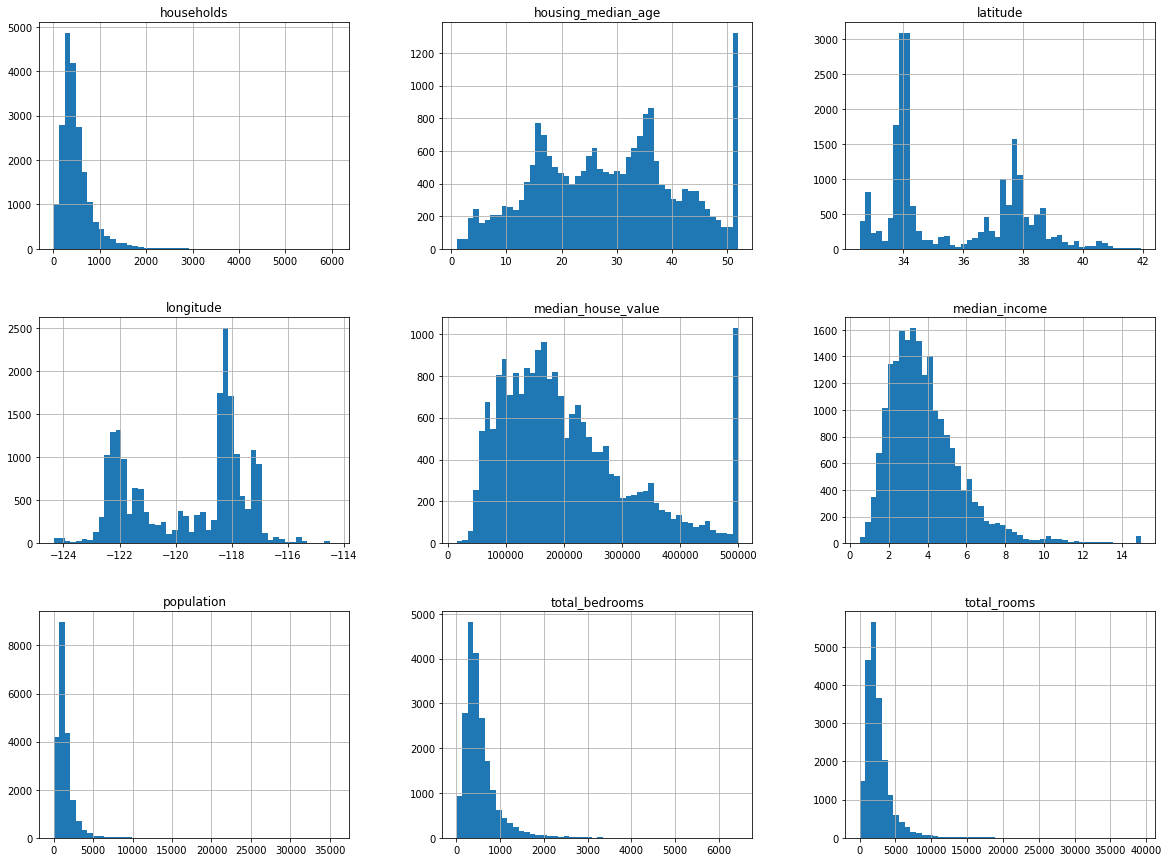

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

Vamos a destacar algunas cosas de estos histogramas:

1. En primer lugar, el atributo de la mediana de los ingresos (median_income) no parece estar expresado en dólares (USD). Tras consultar con el equipo que recopiló los datos, nos informan que **los datos se han escalado y limitado a 15 (en realidad, 15.0001) para los ingresos medios más altos, y a 0,5 (en realidad, 0,4999) para los ingresos medios más bajos**. Trabajar con atributos preprocesados es común cuando hacemos aprendizaje automático (machine learning), y no es necesariamente un problema, pero hay que intentar comprender cómo se calcularon los datos.


2. La "edad media de la vivienda" ("housing median age") y el "valor medio de la vivienda" ("median house value") también se limitaron. **Este último puede ser un problema serio ya que es el atributo objetivo (nuestras etiquetas, lo que tratamos de predecir)**. Esto implica que los algoritmos de Machine Learning que entrenemos pueden aprender que los precios nunca van más allá de ese límite. Es importante verificar con el equipo que usará la salida de nuestro sistema para ver si esto es un problema o no. Si dicen que necesitan predicciones precisas incluso más allá de los $500,000, entonces tienes principalmente dos opciones:
   
   * Recolectar los valores correctos para precios que fueron limitados
   * Eliminar esos distritos del juego de materiales de capacitación (y también del juego de pruebas, ya que el sistema no debe ser evaluado de manera deficiente si predice valores superiores a los 500.000 dólares).
   

3. Estos **atributos tienen escalas muy diferentes**, aunque discutiremos esto más adelante en este capítulo cuando exploremos el escalamiento de características.


4. Finalmente, muchos histogramas son **"tail heavy"**, osea que se extienden mucho más a la derecha de la mediana que a la izquierda. **Esto puede dificultar un poco la detección de patrones para algunos algoritmos de aprendizaje automático**. Intentaremos transformar estos atributos más adelante para tener más distribuciones en forma de campana.

# Creamos un conjunto de pruebas

Vamos a dividir nuestros datos en dos conjuntos, uno con el 20% de los datos para pruebas y otro con el 80%.

No lo haremos de manera aleatoria con el objetivo de evitar que en cada ejecución el resultado sea diferente y porque sino tras entrenar el modelo múltiples veces podría terminar conociendo todos los datos.

Pero además, como nuestro juego de datos es pequeño, tenemos que introducir un paso más para eliminar el riesgo de introducir un "sampling bias" (escoger una muestra que no represente a toda nuestra "población").

Tras hablar con los expertos nos dicen que los ingresos medios son un atributo muy importante para predecir el precio de las casas. En este caso, nos querremos asegurar de que nuestro conjunto de entrenamiento es representativo de las diferentes categorías de ingresos del juego de datos. Como en este caso los ingresos son un valor numérico continuo, vamos a crear un atributo categórico. 

Para empezar, vamos a ver más en detalle la distribución de valores de los ingresos medios:

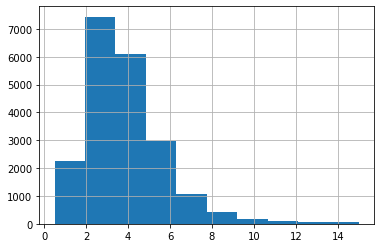

In [ ]:
housing["median_income"].hist()

Podemos ver que la mayoría de los valores se agrupan en torno a 2-5 (decenas de miles de dólares), pero algunos ingresos medios van mucho más allá de 6. 

> **Nota:** Es importante tener suficientes registros del dataset para cada estrato (categoría), sino la estimación de la importancia del estrato puede estar sesgada. Esto también significa que no debe haber demasiados estratos y además cada estrato debe ser lo suficientemente grande.  

El siguiente código crea nuestro atributo categórico ("income_cat") dividiendo el ingreso medio por 1,5 (para limitar el número de categorías de ingresos), y redondeando hacia arriba usando el umbral (para tener categorías discretas), y luego fusionando todas las categorías mayores de 5 en la categoría 5: 

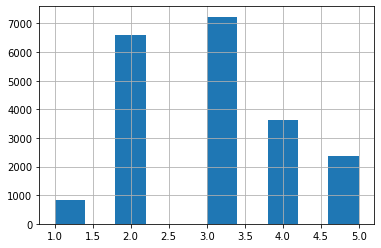

In [ ]:
import numpy as np

housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

housing["income_cat"].hist()

Ahora estamos listos para realizar un muestreo estratificado basado en la categoría de ingresos. Para ello puedes usaremos el método `StratifiedShuffleSplit`de Scikit-Learn:

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
        strat_train_set = housing.loc[train_index]
        strat_test_set = housing.loc[test_index]

Vamos a ver si hemos conseguido lo que queríamos, para ello empecemos por mirar las proporciones de valores que incluye cada categoría:

In [ ]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

Podemos comprobar que si en lugar de usar esta técnica de muestreo estratificado hubiésemos elegido un muestro aleatorio simple, la proporción de nuestros conjuntos de datos de entrenamiento y prueba se parecería menos a la proporción del juego de datos original:

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1.0,0.039826,0.039729,0.040213,0.973236,-0.243309
2.0,0.318847,0.318798,0.324370,1.732260,-0.015195
3.0,0.350581,0.350533,0.358527,2.266446,-0.013820
4.0,0.176308,0.176357,0.167393,-5.056334,0.027480
5.0,0.114438,0.114583,0.109496,-4.318374,0.127011


Como adelantábamos al principio de la lección, gracias a la categorización que hemos realizado hemos evitado que se produzca un sesgo de muestreo (*sampling bias*) debido al tamaño reducido del juego de datos.

# Explorar y visualizar los datos para comprenderlos mejor

Hasta ahora sólo ha echado un vistazo rápido a los datos para tener una idea básica del tipo de datos con el que vamos a trabajar. Ahora el objetivo es profundizar un poco más.

Vamos a crear una copia del conjunto de entrenamiento para poder jugar con él sin corromperlo:

In [ ]:
housing = strat_train_set.copy()

## Visualizar los datos geográficos

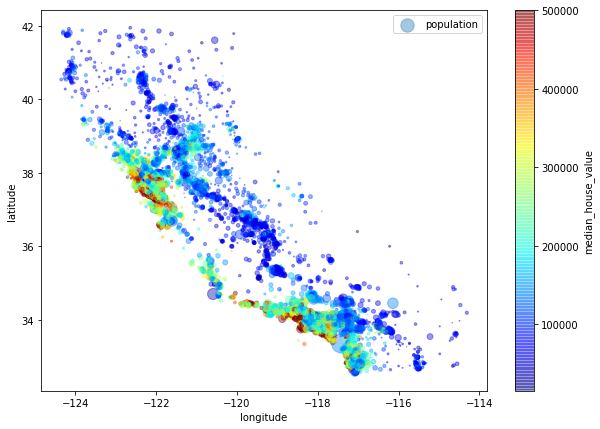

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

Ahora podemos ver la distribución geográfica de los datos, las zonas de más alta densisdad y aquellas zonas donde se concentran los precios más altos. El radio de cada círculo representa la población del distrito, y el color representa el precio que va desde azul para los precios bajos hasta rojo para los altos.

**A partir de esta imagen se puede ver que los precios están muy relacionados con la ubicación** (por ejemplo, si están cerca del océano) **y con la densidad de población**, algo que probablemente ya sabrías. 

Probablemente sea útil utilizar un algoritmo para detectar los clústeres principales y añadir nuevas propiedades que midan la proximidad a los centros de los clústeres. El atributo de proximidad al océano también puede ser útil, aunque en el norte de Californa (de donde son estos datos) los precios de la vivienda en los distritos costeros no son demasiado altos, así que no es una regla simple.

## Buscando correlaciones

Como el juego de datos no es muy grande, es sencillo calcular el coeficiente estándar de correlacion (también llamadado el coeficiente de correlación de Pearson) entre cada par de atributos usando el método "corr()":

In [ ]:
corr_matrix = housing.corr()

Ahora vamos a ver cómo se correlaciona cada atributo con el precio medio de la casa:

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
income_cat            0.642274
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

El coeficiente de correlación oscila entre -1 y 1. Cuando está cerca de 1, significa que hay una correlación positiva fuerte; por ejemplo, el valor mediano de la vivienda tiende a subir cuando el ingreso medio sube. Cuando el coeficiente está cerca de -1, significa que hay una fuerte correlación negativa; se puede ver una pequeña correlación negativa entre la latitud y el valor medio de la vivienda (es decir, los precios tienen una ligera tendencia a bajar cuando se va al norte). Finalmente, coeficientes cercanos a cero significan que no hay correlación lineal. 

![Ejemplos de correlación](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1024px-Correlation_examples2.svg.png)

En esta figura se pueden ver conjuntos de puntos (x, y), con el coeficiente de correlación de Pearson para cada conjunto. La figura del centro tiene una pendiente de 0, pero en ese caso el coeficiente de correlación no está definido porque la varianza de Y es cero. (fuente: [Wikipedia](https://en.wikipedia.org/wiki/Correlation_and_dependence))

El coeficiente de correlación sólo mide correlaciones lineales ("si x sube, entonces y generalmente sube/baja"). Pero no la pendiente de la relación (media) ni otros aspectos, por ejemplo puede perderse por completo las relaciones no lineales (por ejemplo, "si x está cerca de cero, entonces el genérico sube"). Nótese cómo todos los gráficos de la fila inferior tienen un coeficiente de correlación igual a cero a pesar de que sus ejes claramente no son independientes: estos son ejemplos de relaciones no lineales. Además, la segunda fila muestra ejemplos en los que el coeficiente de correlación es igual a 1 o -1; observe que esto no tiene nada que ver con la pendiente. Por ejemplo, la altura de una persona en cm tiene un coeficiente de correlación de 1 con la altura en metros o en nanómetros.

Otra forma de comprobar la correlación entre atributos es usar la función `scatter_matrix` de Pandas, que dibuja cada atributo numérico contra cada otro atributo numérico. Puesto que ahora hay 11 atributos numéricos, obtendríamos 11<sup>2</sup> = 112 dibujos.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe3354ec438>,
      dtype=object)

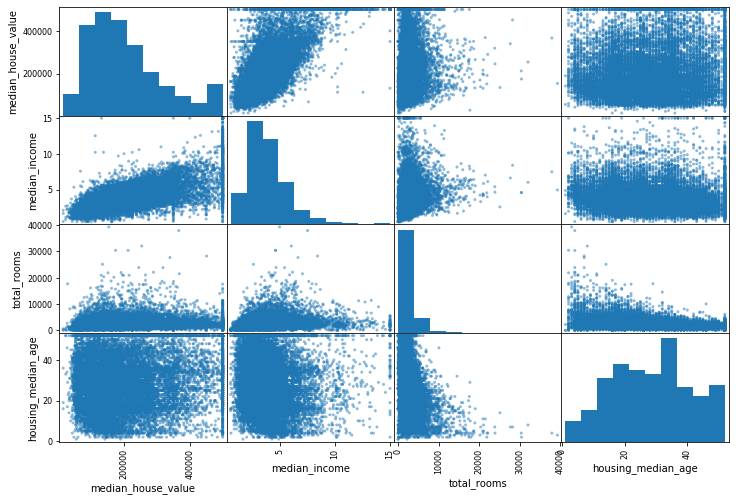

In [ ]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

El atributo que más prometed para predecir el valor mediano de la vivienda es el ingreso medio, así que vamos a enfocarnos en la gráfica de dispersión de su correlación.

[0, 16, 0, 550000]

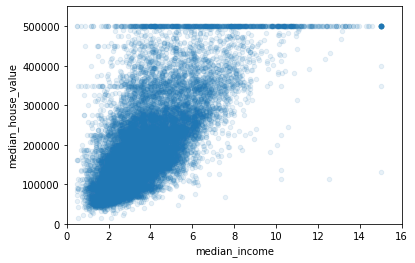

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

Este gráfico revela algunas cosas:

* En primer lugar, la correlación es muy fuerte; se puede ver claramente la tendencia al alza y que los puntos no están demasiado dispersos. 
* En segundo lugar, el tope de precios que observamos anteriormente es claramente visible como una línea horizontal de 500.000 dólares. 

Pero esta trama revela otras líneas rectas menos obvias: una línea horizontal de alrededor de 450.000 dólares, otra de alrededor de 350.000 dólares, quizás una de alrededor de 280.000 dólares, y algunas más por debajo de esa cifra. Puede que sea interesante eliminar los distritos correspondientes para evitar que los algoritmos aprendan a reproducir estas peculiaridades de los datos.

## Experimentando con combinaciones de atributos

Hasta ahora hemos visto algunas peculiaridades de los datos que podríamos querer eliminar antes de entrenar nuesto algoritmo de Machine Learning, y encontramos correlaciones interesantes entre los atributos, en particular con `median_house_value` que es el atributo que queremos predecir. También notamos que algunos atributos tienen una distribución de cola pesada (tail-heavy), por lo que es posible que queramos trasformarlos (por ejemplo, reemplazándolos por su logaritmo).

Una última cosa que podemos hacer es probar varias combinaciones de atributos. Por ejemplo, el número total de habitaciones en un distrito no es muy útil si no se sabe cuántas viviendas hay. Lo que realmente nos interesa es el número de habitaciones por vivienda. Del mismo modo, el número total de habitaciones por sí solo no es muy útil: probablemente queramos compararlo con el número de habitaciones. Y el número de personas por vivienda también parece ser una combinación interesante de atributos a tener en cuenta. Vamos a crear estos nuevos atributos:

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

Ahora veamos de nuevo la matriz de correlaciones:

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
income_cat                  0.642274
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

¡Wow, no está mal! El nuevo atributo `bedrooms_per_room` (-0.2599) está mucho más correlacionado con el valor medio de la casa que con el número total de habitaciones de un distrito (0.1350). Aparentemente, las casas con una relación dormitorio/habitación más baja tienden a ser más caras. 

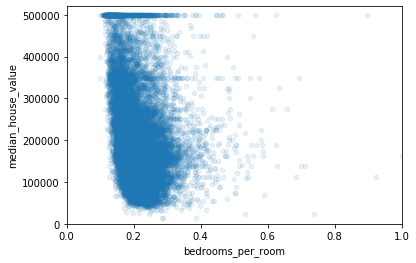

In [ ]:
housing.plot(kind="scatter", x="bedrooms_per_room", y="median_house_value",
             alpha=0.1)
plt.axis([0, 1, 0, 520000])
plt.show()

El atributo `rooms_per_household` (0.1462) también más informativo que el número total de habitaciones en un distrito (0.1350); evidentemente, cuanto más grandes son las casas, más caras son.

Esta fase de exploración no tiene que ser absolutamente exhaustiva; el objetivo es comenzar con buen pie y rápidamente obtener conclusiones que le ayuden a obtener un primer prototipo de buena calidad. Pero este es un proceso iterativo: una vez que se pone en marcha un prototipo, se puede analizar su salida para obtener más información y volver a este paso de exploración.

# Preparar los datos para los algoritmos de Machine Learning

Antes de empezar vamos a cargar un conjunto de entrenamiento limpio (copiando `strat_train_set` una vez más), y separaremos los predictores y las etiquetas ya que no necesariamente queremos aplicar las mismas transformaciones a los predictores y a los valores objetivo (hay que tener en cuenta que `drop()` crea una copia de los datos y no afecta a `strat_train_set`):

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## Limpieza de datos

La mayoría de los algoritmos de Machine Learning no pueden funcionar con atributos con valores nulos, así que vamos a crear unas cuantas funciones arreglar esta situación. Antes vimos que había registros con el atributo `total_bedrooms` a null:

In [ ]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN,2.0
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN,4.0
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN,4.0
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND,2.0
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN,3.0


Para arreglarlo tenemos tres opciones:

1. Deshacernos de los distritos con `total_bedrooms` a null
2. Deshacernos del atributo
3. Cargarle algún valor (cero, la media, la mediana, etc.)

Si elegimos la opción 3, tendremos calcular el valor medio del conjunto de entrenamiento y usarlo para completar los valores que falten en el conjunto de entrenamiento, pero también tenemos que guardar el valor calculado. Lo necesitaremos más tarde para reemplazar los valores que falten en el conjunto de prueba cuando queramos evaluar el sistema, y también cuando el sistema entre en funcionamiento para reemplazar los valores que falten en los nuevos datos.

In [ ]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3

Pero Scikit-Learn proporciona una clase muy útil para lidiar con registros con atributos a `null`: `Imputer`. 

Vamos a ver cómo usarlo. Lo primero es crear una instancia `Imputer`, especificando que queremos reemplazar los valores `null` de cada atributo con la mediana de ese atributo:

In [ ]:
# Warning: Since Scikit-Learn 0.20, the sklearn.preprocessing.Imputer class was replaced 
# by the sklearn.impute.SimpleImputer class.
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median")

Como la mediana sólo se puede calcular sobre atributos numéricos, tenemos que crear una copia de los datos sin el atributo `ocean_proximity`:

In [ ]:
housing_num = housing.drop('ocean_proximity', axis=1)

Ahora ya podemos invocar al método `fit` para eliminar los valores nulos:

In [ ]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

El imputador simplemente calcula la mediana de cada atributo y la almacena en su variable `statistics_ instance`. En nuestro juego de datos actual sólo había valores nules en el atributo `total_bedrooms`, pero no podemos asegurar que no nos encontremos valores nulos en otros atributos una vez empecemos a usar el sistema, por lo que es mejor aplicar el imputador a todos los atributos numéricos:

In [ ]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

Ahora podemos usar el imputador "entrenado" para transformar el juego de datos de entrenamiento reemplazando los valores perdidos por las medianas aprendidas:

In [ ]:
X = imputer.transform(housing_num)

El resultado es una matriz Numpy sencilla que contiene los registros transformados. Si usted quiere volver a ponerlo en un Panda DataFrame, es sencillo:

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,2.0
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,4.0
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,4.0
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,2.0
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,3.0


## Ocuparnos del texto y atributos categóricos

Anteriormente eliminamos el atributo categórico `ocean_proximity` porque es un atributo de tipo texto y por tanto podiamos calcular su mediana.

In [ ]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


Como la mayoría de los algoritmos de Machine Learning están preparados para trabajar con números, vamos a convertir estas etiquetas de texto en números.

Scikit-Learn proporciona un transformador que se llama `OrdinalEncoder`.

In [ ]:
try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import OrdinalEncoder # Scikit-Learn < 0.20

In [ ]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

Esto está mejor: ahora podemos usar estos datos numéricos en cualquier algoritmo ML. Podemos ver el mapeo que este codificador ha generado explorando el atributo categories_ ("<1H OCEAN" está mapeado a 0, "INLAND" está mapeado a 1, etc.):

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Un problema con esta transformación es que los algoritmos ML asumirán que dos valores cercanos son más similares que dos valores distantes. Obviamente este no es el caso (por ejemplo, las categorías 0 y 4 son más similares que las categorías 0 y 1). 

Para solucionar este problema, una solución común es crear un atributo binario por categoría: poniendo un atributo igual a 1 cuando la categoría es "<1H OCEAN" (y 0 en caso contrario), otro atributo igual a 1 cuando la categoría es "INLAND" (y 0 en caso contrario), y así sucesivamente. A esto se le llama una codificación caliente, porque sólo un atributo será igual a 1 (caliente) (*one-hot encoding*), mientras que los otros serán 0 (frío).

Para esta tarea Scikit-Learn proporciona un codificador llamado `OneHotEncoder` para convertir valores categóricos enteros en vectores "one-hot". Vamos a codificar las categorias como vectores "one-hot". 

> Nota: hay que tener en cuenta que `fit_transform()` espera una matriz 2D, pero el `housing_cat_encoded` es una matriz 1D, por lo que necesitamos darle nueva forma:

In [ ]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Fíjate que la salida es una [matriz dispersa de SciPy](https://machinelearningmastery.com/sparse-matrices-for-machine-learning/), en lugar de una matriz NumPy. Esto es muy útil cuando se tienen atributos categóricos con miles de categorías. Después de una codificación "one-hot" obtenemos una matriz con miles de columnas, y la matriz está llena de ceros excepto una con un 1 por fila. Usar ingentes cantidades de memoria para almacenar ceros sería un derroche, así que en su lugar usamos matriz dispersa que sólo almacena la ubicación de los elementos que no son ceros. Puede usarla mayormente como una matriz 2D normal, pero si realmente quieres convertirla a una matriz NumPy (densa), simplemente tienes que llamar al método `toarray()`:

## Transformadores a medida

A pesar de que Scikit-Learn provea muchos transformadores útiles, tendrás que escribir los tuyos propios para tareas tales como: operaciones de limpieza personalizadas o combinar atributos específicos. 

También querrás que tu transformador funcione a la perfección con las capacidades de Scikit-Learn (como los `pipelines`), y como Scikit-Learn se basa en "duck typing" (no en herencia), todo lo que hay que hay que hacer es usar la clase `FunctionTransformer` de Scikit-Learn que te permite crear fácilmente un transformador basado en una función de transformación. Tenga en cuenta que necesitamos establecer `validate=False` porque los datos contienen valores que no flotantes.

In [ ]:
from sklearn.preprocessing import FunctionTransformer

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": True})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

En este ejemplo el transformador tiene un hiperparámetro, `add_bedrooms_per_room`, establecido en `True` por defecto. Este hiperparómetro te permitirá averiguar fácilmente si añadir este atributo ayuda o no a los algoritmos de Machine Learning. De forma más general, puede añadir un hiperparámetro para controlar la preparación de aquellos datos de los que no esté 100% seguro. Cuanto más automatizados sean estos pasos de preparación de datos, más combinaciones podrá probar automáticamente, lo que hace que sea mucho más probable que encuentre una gran combinación (y que le ahorre mucho tiempo).

## Feature Scaling

Una de las transformaciones más importantes que necesita aplicar a sus datos es esta. Salvo en pocas excepciones, los algoritmos de Machine Learning no funcionan bien cuando los atributos numéricos de entrada tienen escalas muy diferentes. Este es el caso: el número total de habitaciones oscila entre 6 y 39.320, mientras que los ingresos medios sólo oscilan entre 0 y 15. Tenga en cuenta que, por lo general, no es necesario escalar los valores previstos.

Hay dos maneras comunes de conseguir que todos los atributos tengan la misma escala: 

* **Escalado min-máx** (mucha gente llama a esto normalización): es muy sencillo, los valores se desplazan y reescalan de modo que terminan oscilando entre 0 y 1. Hacemos esto restando el valor mínimo y dividiéndolo por el máximo menos el mínimo. Scikit-Learn proporciona un transformador llamado `inMaxScaler` para esto. Tiene un hiperparámetro `feature_range` que te permite cambiar el rango si no quieres 0-1 por alguna razón.


* **Estandarización**: este es muy diferente: primero resta el valor medio (de modo que los valores estandarizados siempre tienen una media cero) y, a continuación, se divide por la desviación para que la distribución resultante tenga desviación unitaria. A diferencia del escalado mín-máx, la estandarización no vincula los valores a un rango específico, lo que puede ser un problema para algunos algoritmos (por ejemplo, las redes neuronales a menudo esperan un valor de entrada que va de 0 a 1). Sin embargo, la normalización se ve mucho menos afectada por los valores atípicos. Por ejemplo, supongamos que un distrito tuviera un ingreso medio igual a 100 (por error). La escala mínimo-máxima aplastaría todos los demás valores de 0-15 a 0-0,15, mientras que la estandarización no sería muy afectada. Scikit-Learn proporciona un transformador llamado `StandardScaler` para la estandarización.

> **Nota** Como con todas las transformaciones, es importante aplicar estas transformaciones sólo a los datos de entrenamiento, no al conjunto de datos completo (incluyendo el conjunto de pruebas).

## Transformation Pipelines

Como puedes ver, hay muchos pasos de transformación de datos que hay que ejecutar en el orden correcto. Por suerte, Scikit-Learn proporciona la clase `Pipeline` para ayudar con estas secuencias de transformaciones. Aquí hay un pequeño `pipeline` para los atributos numéricos

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

El constructor de la clase `Pipeline` recibe una lista de pares de nombre/estimador que definen una secuencia de pasos. Todos menos el último estimador deben ser transformadores (es decir, deben tener un método `fit_transform()`). Los nombres pueden ser los que queramos.

Cuando se llama al método `fit()` de `Pipeline`, se llama `fit_transform()` secuencialmente en todos los transformadores, pasando la salida de cada llamada como parámetro a la siguiente llamada, hasta llegar al estimador final, para lo cual sólo se llama al método `fit()`.

El Pipeline expone los mismos métodos que el estimador final. En este ejemplo, el último estimador es un `StandardScaler`, que es un transformador, por lo que la tubería tiene un método `transform()` que aplica todas las transformaciones a los datos en secuencia (también tiene un método `fit_transform` que podríamos haber usado en lugar de llamar `fit()` y luego `transform()`).

Ahora tienes un Pipeline para valores numéricos, y también necesitas aplicar el `LabelBinarizer` a los valores categóricos: ¿cómo puedes unir estas transformaciones en una única tubería? Scikit-Learn proporciona una clase de `FeatureUnion` para esto. Le das una lista de transformadores (que pueden ser tuberías completas de transformadores), y cuando su se llama a su método `transform()` este ejecuta el método `transform()` de cada transformador en paralelo, espera la salida, y luego los concatena y devuelve el resultado (y por supuesto llamando a su método `fit()` llama a todos los métodos `fit()` de cada transformador). Una tubería completa que maneja atributos numéricos y categóricos que tiene este aspecto:

In [ ]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

In [ ]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

Y puedes ejecutar todo el pipeline de manera simple:

In [ ]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
housing_prepared.shape

(16512, 17)

# Elegir y entrenar un modelo